#  <span style="color:SeaGreen"> Part 3 :</span><span style="color:DarkSlateBlue"> Football Transfer Market Data ML Modelling </span>


### This notebook focuses on implementing Machine Learning Algorithms for evaluating football player transfer market vlaues. Various train:test splits, evaluation, validation and hyperparameter tuning techniques are leveraged in optimising each model

#### <span style="color:Teal"> Importing Dependencies</span>

In [3]:
# Visualization Libraries
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

#Preprocessing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

from pycaret.regression import *

# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

#### <span style="color:Teal">Loading Data</span>

In [2]:
# NO SCALING

# One-hot label encoded but no scaling or feature selection
df8_dummies_all = pd.read_csv('df8_dummies_all.csv')

# Only numerical features, no scaling or feature selection
numerical_features_df = pd.read_csv('numerical_features_df.csv')


# # MINMAX SCALER

# # Only Numerical Features and MINMAX Scaling
# numerical_features_df_4_midmax_scaled = pd.read_csv('numerical_features_df_4_midmax_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and MinMax Scaling NO Feature Selection
df8_dummies_essential_mm_scaled = pd.read_csv('df8_dummies_essential_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features and MinMAx Scaling, NO Feature Selection
df8_dummies_all_mm_scaled = pd.read_csv('df8_dummies_all_mm_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and MinMax Scaling
# df8_dummies_all_fs_mm_scaled = pd.read_csv('df8_dummies_all_fs_mm_scaled.csv')


# # ROBUST SCALER

# # Only Numerical Features and Robust Scaling
# numerical_features_df_rb_scaled = pd.read_csv('numerical_features_df_rb_scaled.csv')

# # One-hot label encoded on select Categorical features(last_season, foot, position, sub_position, age_group) 
# # and Robust Scaling NO Feature Selection
# df8_dummies_essential_rb_scaled = pd.read_csv('df8_dummies_essential_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features and Robust Scaling, NO Feature Selection
df8_dummies_all_rb_scaled = pd.read_csv('df8_dummies_all_rb_scaled.csv')

# # One-hot label encoded on ALL Categorical features with Feature Selection and Robust Scaling
df8_dummies_all_fs_rb_scaled = pd.read_csv('df8_dummies_all_fs_rb_scaled.csv')

# <span style="color:Tomato"> Original Code from First Iteration</span>

## Base Model: Linear Regression on only Numerical Features ( No Scaling or Feature Selection)

#### <span style="color:Teal">Confirming Load</span>

In [3]:
numerical_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   height_in_cm             10167 non-null  float64
 1   market_value_in_eur      10167 non-null  float64
 2   age                      10167 non-null  int64  
 3   remaining_contract_days  10167 non-null  int64  
 4   games_total              10167 non-null  int64  
 5   goals_total              10167 non-null  int64  
 6   assists_total            10167 non-null  int64  
 7   minutes_played_total     10167 non-null  int64  
 8   goals_for_total          10167 non-null  int64  
 9   goals_against_total      10167 non-null  int64  
 10  clean_sheet_total        10167 non-null  int64  
 11  yellow_cards_total       10167 non-null  int64  
 12  red_cards_total          10167 non-null  int64  
 13  games_2019               10167 non-null  int64  
 14  goals_2019            

In [4]:
numerical_features_df.shape

(10167, 58)

#### <span style="color:Teal">Isolating target Variable</span>

In [5]:
y = numerical_features_df['market_value_in_eur']

In [6]:
y.shape

(10167,)

In [7]:
y.head()

0    25000000.0
1      200000.0
2     2500000.0
3      200000.0
4      200000.0
Name: market_value_in_eur, dtype: float64

In [8]:
X = numerical_features_df.drop(['market_value_in_eur'], axis = 1)

In [9]:
X.shape

(10167, 57)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [11]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (9150, 57), (1017, 57), (9150,), (1017,))

In [12]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [13]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Method to calculate the cross-validation scores and additional metrics
def get_cv_scores(model):
    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    # Additional metrics
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    # Display cross-validation scores
    print('CV Mean R²: ', np.mean(scores))
    print('CV STD: ', np.std(scores))
    
    # Display additional metrics
    print('Mean Absolute Error (MAE): ', mae)
    print('Mean Squared Error (MSE): ', mse)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print('R-squared (R²): ', r2)
    print('\n')

In [15]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.461553541212785
CV STD:  0.047879883027327146
Mean Absolute Error (MAE):  3825828.087382881
Mean Squared Error (MSE):  49185008763166.5
Root Mean Squared Error (RMSE):  7013202.461298726
R-squared (R²):  0.4756433374153147




The CV Mean R²  above is not the worst for the first model and current dataset of only Numerical Variables. The MAE, MSE and RMSE are very high which indicates a considerable difference between taining and testing values.

CV Mean R²: The mean of the cross-validation scores (`r2` in this case). It represents the average performance of the model across different folds (10) in the cross-validation process. Higher values indicate better performance. `r2` (coefficient of determination) ranges from 0 to 1, where 1 indicates perfect predictions.

CV STD: The standard deviation of the cross-validation scores. It measures the amount of variation or dispersion of the model's performance across different folds. Lower values indicate more consistent performance.

Mean Absolute Error (MAE): It measures the average absolute differences between predicted and actual values. It provides a straightforward interpretation of the average prediction error with a lower value indicating better performance. It is less sensitive to outliers.

Mean Squared Error (MSE): It calculates the average of the squared differences between predicted and actual values. MSE penalizes larger errors more heavily than MAE. MSE is commonly used but sensitive to outliers. Lower values are better.

Root Mean Squared Error (RMSE): It is the square root of MSE and provides an interpretable measure in the same units as the target variable. RMSE penalizes larger errors more than MAE and is sensitive to outliers. Lower values are better.
 
R-squared (R²): It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.



In [16]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print('\n',lr.coef_)

8288529.399224044

 [ 7.60616521e+03 -4.51915372e+05  3.42309447e+03 -8.92498493e+14
 -2.86220385e+15  2.73234665e+15  3.02592967e+16 -2.30285193e+14
  1.99035108e+15  3.09243779e+14 -1.69639258e+14 -4.87178505e+13
  8.92498493e+14  2.86220385e+15 -2.73234665e+15 -3.02592967e+16
  2.30285194e+14 -1.99035108e+15 -3.09243779e+14  1.69639258e+14
  4.87178507e+13  8.92498493e+14  2.86220385e+15 -2.73234665e+15
 -3.02592967e+16  2.30285193e+14 -1.99035108e+15 -3.09243779e+14
  1.69639257e+14  4.87178496e+13  8.92498492e+14  2.86220385e+15
 -2.73234665e+15 -3.02592967e+16  2.30285194e+14 -1.99035108e+15
 -3.09243779e+14  1.69639258e+14  4.87178496e+13  8.92498493e+14
  2.86220385e+15 -2.73234665e+15 -3.02592967e+16  2.30285193e+14
 -1.99035108e+15 -3.09243779e+14  1.69639258e+14  4.87178498e+13
  8.92498492e+14  2.86220385e+15 -2.73234665e+15 -3.02592967e+16
  2.30285194e+14 -1.99035108e+15 -3.09243778e+14  1.69639258e+14
  4.87178499e+13]


The y-intercept (intercept variable) and the slope or coefficient which are parameters learnt by the model. Linear regression finds the parameters a and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [17]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4756433374153147
R² testing set score: 0.4846605933124807


The results from this first model are are poor with an accuarcy of 0.37. This is to be expected as the dataset used does not include the domestic leagues or positions of players.

In [18]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [19]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,9.662393e+06
6098,2500000.0,-1.656217e+06
4338,2000000.0,6.414189e+06
2232,300000.0,4.099792e+06
9798,12000000.0,9.183957e+06


### <span style="color:Teal">Second Split: 80% Training and 20% for Testing</span>

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) # 80% training and 20% test# Split dataset into training set and test set


In [21]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (8133, 57), (2034, 57), (8133,), (2034,))

In [22]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [23]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.46643980791347894
CV STD:  0.04972767104417097
Mean Absolute Error (MAE):  3769023.188332186
Mean Squared Error (MSE):  48421886640590.47
Root Mean Squared Error (RMSE):  6958583.666277964
R-squared (R²):  0.49098366135926164




In [25]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.49098366135926164
R² testing set score: 0.4746412728903766


There is an improvement in results on a 80:20 trains:test split.

In [26]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [27]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,1.110616e+07
6098,2500000.0,-9.780437e+05
4338,2000000.0,6.876632e+06
2232,300000.0,4.374610e+06
9798,12000000.0,7.579573e+06


### <span style="color:Teal">Third Split: 70% Training and 30% for Testing</span>

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [29]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 57), (10167,), (7116, 57), (3051, 57), (7116,), (3051,))

In [30]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [31]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.46180003662262115
CV STD:  0.05991359098631207
Mean Absolute Error (MAE):  3756558.8216164466
Mean Squared Error (MSE):  47185120144101.695
Root Mean Squared Error (RMSE):  6869142.606184683
R-squared (R²):  0.4944196998136786




The CV Mean R² has dropped with a 70:30 train:test split but so too has the STD.

In [33]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.4944196998136786
R² testing set score: 0.4665536471851397


In [34]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [35]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,1.047749e+07
6098,2500000.0,-9.453162e+05
4338,2000000.0,7.154392e+06
2232,300000.0,4.323567e+06
9798,12000000.0,8.294861e+06


## Second Model: Linear Regression on Full Dummies Dataset ( No Scaling or Feature Selection)

In [36]:
df8_dummies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 383 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(14), int64(369)
memory usage: 29.7 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [37]:
y = df8_dummies_all['market_value_in_eur']

In [38]:
y.shape

(10167,)

In [39]:
X = df8_dummies_all.drop(['market_value_in_eur'], axis = 1)

In [40]:
X.shape

(10167, 382)

In [45]:
X.head()

,height_in_cm,age,remaining_contract_days,games_total,goals_total,assists_total,minutes_played_total,goals_for_total,goals_against_total,clean_sheet_total,yellow_cards_total,red_cards_total,games_2019,goals_2019,assists_2019,minutes_played_2019,goals_for_2019,goals_against_2019,clean_sheet_2019,yellow_cards_2019,red_cards_2019,games_2020,goals_2020,assists_2020,minutes_played_2020,goals_for_2020,goals_against_2020,clean_sheet_2020,yellow_cards_2020,red_cards_2020,games_2021,goals_2021,assists_2021,minutes_played_2021,goals_for_2021,goals_against_2021,clean_sheet_2021,yellow_cards_2021,red_cards_2021,games_2022,goals_2022,assists_2022,minutes_played_2022,goals_for_2022,goals_against_2022,clean_sheet_2022,yellow_cards_2022,red_cards_2022,games_2023,goals_2023,assists_2023,minutes_played_2023,goals_for_2023,goals_against_2023,clean_sheet_2023,yellow_cards_2023,red_cards_2023,mins_per_goal_2023,mins_per_goal_2022,mins_per_goal_2021,mins_per_goal_2020,mins_per_goal_2019,mins_per_goal_total,mins_per_assist_2023,mins_per_assist_2022,mins_per_assist_2021,mins_per_assist_2020,mins_per_assist_2019,mins_per_assist_total,sub_position_Attacking Midfield,sub_position_Central Midfield,sub_position_Centre-Back,sub_position_Centre-Forward,sub_position_Defensive Midfield,sub_position_Goalkeeper,sub_position_Left Midfield,sub_position_Left Winger,sub_position_Left-Back,sub_position_Right Midfield,sub_position_Right Winger,sub_position_Right-Back,sub_position_Second Striker,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,foot_both,foot_left,foot_right,age_group_Ages 22 - 26,age_group_Ages 27 - 32,age_group_Ages 33 - 38,age_group_Ages 39 - 44,age_group_Ages Under 22,current_club_domestic_competition_id_BE1,current_club_domestic_competition_id_DK1,current_club_domestic_competition_id_ES1,current_club_domestic_competition_id_FR1,current_club_domestic_competition_id_GB1,current_club_domestic_competition_id_GR1,current_club_domestic_competition_id_IT1,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1,current_club_name_1.FC Heidenheim 1846,current_club_name_1.FC Köln,current_club_name_1.FC Union Berlin,current_club_name_1.FSV Mainz 05,current_club_name_AC Ajaccio,current_club_name_AC Horsens,current_club_name_AC Milan,current_club_name_AC Monza,current_club_name_ACF Fiorentina,current_club_name_AE Kifisias,current_club_name_AEK Athens,current_club_name_AFC Bournemouth,current_club_name_AJ Auxerre,current_club_name_APO Levadiakos,current_club_name_AS Monaco,current_club_name_AS Roma,current_club_name_AZ Alkmaar,current_club_name_Aalborg BK,current_club_name_Aarhus GF,current_club_name_Aberdeen FC,current_club_name_Adana Demirspor,current_club_name_Ajax Amsterdam,current_club_name_Akhmat Grozny,current_club_name_Alanyaspor,current_club_name_Almere City FC,current_club_name_Angers SCO,current_club_name_Antalyaspor,current_club_name_Aris Thessaloniki,current_club_name_Arsenal FC,current_club_name_Asteras Tripolis,current_club_name_Aston Villa,current_club_name_Atalanta BC,current_club_name_Athletic Bilbao,current_club_name_Atlético de Madrid,current_club_name_Atromitos Athens,current_club_name_Baltika Kaliningrad,current_club_name_Basaksehir FK,current_club_name_Bayer 04 Leverkusen,current_club_name_Bayern Munich,current_club_name_Besiktas JK,current_club_name_Boavista FC,current_club_name_Bologna FC 1909,current_club_name_Borussia Dortmund,current_club_name_Borussia Mönchengladbach,current_club_name_Brentford FC,current_club_name_Brighton & Hove Albion,current_club_name_Bröndby IF,current_club_name_Burnley FC,current_club_name_CA Osasuna,current_club_name_CD Santa Clara,current_club_name_CF Estrela Amadora SAD,current_club_name_CS Marítimo,current_club_name_CSKA Moscow,current_club_name_Cagliari Cal

In [46]:
X = X.drop(['mins_per_goal_2023', 'mins_per_goal_2022', 'mins_per_goal_2021', 'mins_per_goal_2020', 'mins_per_goal_2019', 'mins_per_goal_total', 'mins_per_assist_2023', 'mins_per_assist_2022', 'mins_per_assist_2021', 'mins_per_assist_2020', 'mins_per_assist_2019', 'mins_per_assist_total'], axis=1)

### <span style="color:Teal">First Split: 90% Training and 10% for Testing</span>

In [47]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) # 90% training and 10% test

In [48]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (9150, 370), (1017, 370), (9150,), (1017,))

In [49]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [50]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5888179721042632
CV STD:  0.037309697371554866
Mean Absolute Error (MAE):  3294371.828300829
Mean Squared Error (MSE):  34372076507490.363
Root Mean Squared Error (RMSE):  5862770.378199232
R-squared (R²):  0.633562587934918




An improvement in scores which is to be expected as the dataset in use contains all categorical variables following one-hot label encoding.

In [52]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.633562587934918
R² testing set score: 0.6162479584859166


The model appears to be slighlty underfitting with a higher training score than testing.

In [53]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [54]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.560740e+06
6098,2500000.0,9.092843e+06
4338,2000000.0,5.091879e+06
2232,300000.0,-1.728910e+05
9798,12000000.0,5.817660e+06


### <span style="color:Teal">First Split: 80% Training and 20% for Testing</span>

In [55]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [56]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [57]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [58]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5878642702206175
CV STD:  0.03588102808779535
Mean Absolute Error (MAE):  3314387.627062488
Mean Squared Error (MSE):  34792831442229.723
Root Mean Squared Error (RMSE):  5898544.858033185
R-squared (R²):  0.634253828168225




The STD on 10-fold CV has reduced considerably from previous models which is promising.

In [60]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5878642702206175
CV STD:  0.03588102808779535
Mean Absolute Error (MAE):  3314387.627062488
Mean Squared Error (MSE):  34792831442229.723
Root Mean Squared Error (RMSE):  5898544.858033185
R-squared (R²):  0.634253828168225




In [61]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.634253828168225
R² testing set score: 0.6135374270043161


The model appears to be generalising better on an 80:20 test:train split.

In [62]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [63]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.762380e+06
6098,2500000.0,9.834331e+06
4338,2000000.0,5.201755e+06
2232,300000.0,-7.595809e+03
9798,12000000.0,5.614548e+06


### <span style="color:Teal">First Split: 70% Training and 30% for Testing</span>

In [64]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [65]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (7116, 370), (3051, 370), (7116,), (3051,))

In [66]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [67]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5837762506723686
CV STD:  0.04729512707299338
Mean Absolute Error (MAE):  3293750.7889663256
Mean Squared Error (MSE):  33618371838917.65
Root Mean Squared Error (RMSE):  5798135.203573443
R-squared (R²):  0.6397850323536791




In [69]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6397850323536791
R² testing set score: 0.5929513604589975


In [70]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [71]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,500000.0,5.716840e+06
6098,2500000.0,9.654890e+06
4338,2000000.0,5.156919e+06
2232,300000.0,-2.740979e+05
9798,12000000.0,6.237673e+06


Again, the Linear Regression Model is performing better to the data on an 80:20 train:test split.

## Third Model: Linear Regression on Reduced Dummies Dataset ( MinMax Scaled)

In [72]:
df8_dummies_essential_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height_in_cm                     10167 non-null  float64
 1   market_value_in_eur              10167 non-null  float64
 2   age                              10167 non-null  float64
 3   remaining_contract_days          10167 non-null  float64
 4   games_total                      10167 non-null  float64
 5   goals_total                      10167 non-null  float64
 6   assists_total                    10167 non-null  float64
 7   minutes_played_total             10167 non-null  float64
 8   goals_for_total                  10167 non-null  float64
 9   goals_against_total              10167 non-null  float64
 10  clean_sheet_total                10167 non-null  float64
 11  yellow_cards_total               10167 non-null  float64
 12  red_cards_total   

#### <span style="color:Teal">Isolating target Variable</span>

In [73]:
y = df8_dummies_essential_mm_scaled['market_value_in_eur']

In [74]:
y.shape

(10167,)

In [75]:
X = df8_dummies_essential_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [76]:
X.shape

(10167, 82)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [77]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [78]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 82), (10167,), (8133, 82), (2034, 82), (8133,), (2034,))

In [79]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [80]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.46855655838416527
CV STD:  0.05046935387585867
Mean Absolute Error (MAE):  0.020727379395815815
Mean Squared Error (MSE):  0.001481128420987677
Root Mean Squared Error (RMSE):  0.03848543128233951
R-squared (R²):  0.49559488077657754




In [82]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.49559488077657754
R² testing set score: 0.4792828408039541


In [83]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [84]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.059509
6098,0.013834,-0.007751
4338,0.011056,0.035767
2232,0.001611,0.017761
9798,0.066615,0.032043


The model evaluation scores are worse on this dataset. This dataset contains a select few categorical variables in last_season, foot, position, sub_position and age_group which have been one-hot label encoded and numerical varaiables scaled with the MinMax Scaler.

## Third Model: Linear Regression on Full Dummies Dataset ( MinMax Scaled)

In [85]:
df8_dummies_all_mm_scaled.shape

(10167, 371)

In [86]:
df8_dummies_all_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 371 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(58), int64(313)
memory usage: 28.8 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [87]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [88]:
y.shape

(10167,)

In [89]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [90]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [91]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [92]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [93]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [94]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.587894891035262
CV STD:  0.03550699310266579
Mean Absolute Error (MAE):  0.01840413868865538
Mean Squared Error (MSE):  0.0010751504477229715
Root Mean Squared Error (RMSE):  0.03278948684750909
R-squared (R²):  0.6338525531734878




This Model on MinMAx scaled data results indicate good generalising of the model.

In [96]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6338525531734878
R² testing set score: 0.6123998847163958


In [97]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [98]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.033295
6098,0.013834,0.054169
4338,0.011056,0.027679
2232,0.001611,0.000519
9798,0.066615,0.030334


The models so far are definitely performing better on the larger datasets with all features.

## Fourth Model: Linear Regression on  Dummies Dataset  with Feature Selection based on Pearson Correlation( Robust Scaled)

In [99]:
df8_dummies_all_fs_rb_scaled.shape

(10167, 62)

In [100]:
df8_dummies_all_fs_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 62 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   market_value_in_eur                       10167 non-null  float64
 1   remaining_contract_days                   10167 non-null  float64
 2   games_total                               10167 non-null  float64
 3   goals_total                               10167 non-null  float64
 4   assists_total                             10167 non-null  float64
 5   minutes_played_total                      10167 non-null  float64
 6   goals_for_total                           10167 non-null  float64
 7   goals_against_total                       10167 non-null  float64
 8   clean_sheet_total                         10167 non-null  float64
 9   yellow_cards_total                        10167 non-null  float64
 10  red_cards_total                   

#### <span style="color:Teal">Isolating target Variable</span>

In [108]:
y = df8_dummies_all_fs_rb_scaled['market_value_in_eur']

In [109]:
y.shape

(10167,)

In [110]:
X = df8_dummies_all_fs_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [111]:
X.shape

(10167, 61)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [112]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [113]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 61), (10167,), (8133, 61), (2034, 61), (8133,), (2034,))

In [114]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [115]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5434314372773184
CV STD:  0.03919517185286993
Mean Absolute Error (MAE):  1.3878632904151873
Mean Squared Error (MSE):  6.481395780589346
Root Mean Squared Error (RMSE):  2.545858554709854
R-squared (R²):  0.5741677242456459




In [117]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.5741677242456459
R² testing set score: 0.5679937970373361


In [118]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [119]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,-0.12,4.390961
6098,0.68,1.780121
4338,0.48,1.772552
2232,-0.20,0.732880
9798,4.48,1.843018


Again, this dataset with specific features selected based on higher correlation to the target variable has performed worse.

## Fifth Model: Linear Regression on  Dummies Dataset with all features ( Robust Scaled)

In [120]:
df8_dummies_all_rb_scaled.shape

(10167, 371)

In [121]:
df8_dummies_all_rb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Columns: 371 entries, height_in_cm to current_club_name_Ümraniyespor
dtypes: float64(58), int64(313)
memory usage: 28.8 MB


#### <span style="color:Teal">Isolating target Variable</span>

In [289]:
y = df8_dummies_all_rb_scaled['market_value_in_eur']

In [290]:
y.shape

(10167,)

In [291]:
X = df8_dummies_all_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [292]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [293]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [127]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

In [128]:
#Instantiating a class of Linear Regression 
lr = LinearRegression()

In [129]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean R²:  0.5858957098892343
CV STD:  0.036121858558346515
Mean Absolute Error (MAE):  1.321536025029663
Mean Squared Error (MSE):  5.567279912602478
Root Mean Squared Error (RMSE):  2.3595084048594694
R-squared (R²):  0.6342257817297732




The results for CV Mean R² and CV STD are very similar but slightly better than the model with data that had been scaled using the MinMax scaler. The MAE, MAE and RMSE are higher which indicates that it does not generalise as well as the MINMAX scaled data Model. The features are the same.

In [131]:
# Comparing training to testing results
print(f'R² training set score: {lr.score(X_train, y_train)}')
print(f'R² testing set score: {lr.score(X_test, y_test)}')

R² training set score: 0.6342257817297732
R² testing set score: 0.6123449768678766


In [132]:
# Calculate the predicted values
y_pred = lr.predict(X_test)

In [133]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,-0.12,1.913574
6098,0.68,3.621582
4338,0.48,1.745605
2232,-0.20,-0.314941
9798,4.48,1.916504


## Sixth Model: Ridge Regression on  Dummies Dataset with all features ( Robust Scaled)

In [134]:
# Instantiating and Fitting model to data
ridge = Ridge().fit(X_train, y_train)

In [135]:
# Calculate the mean values and Standard deviation
get_cv_scores(ridge)

CV Mean R²:  0.5890847669738467
CV STD:  0.03621980672868254
Mean Absolute Error (MAE):  1.3238278973014463
Mean Squared Error (MSE):  5.567090950313202
Root Mean Squared Error (RMSE):  2.3594683617953436
R-squared (R²):  0.6342381966855015




In [136]:
# Comparing training to testing results
print(f'R² training set score: {ridge.score(X_train, y_train)}')
print(f'R² testing set score: {ridge.score(X_test, y_test)}')

R² training set score: 0.6342381966855015
R² testing set score: 0.6126170415723522


#### <span style="color:Teal">Adjusting hyperparameters</span>

In [137]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [138]:
# Comparing training to testing results
print(f'R² training set score: {ridge10.score(X_train, y_train)}')
print(f'R² testing set score: {ridge10.score(X_test, y_test)}')

R² training set score: 0.6291319882762885
R² testing set score: 0.6055436617301521


In [139]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)


In [140]:
# Comparing training to testing results
print(f'R² training set score: {ridge01.score(X_train, y_train)}')
print(f'R² testing set score: {ridge01.score(X_test, y_test)}')

R² training set score: 0.6343303715348654
R² testing set score: 0.6130284591984112


Ridge regression using L2 regularistaion scored almost identically to the previous linear regression model which is no surpise as it too is a linear model. Ridge regression would be better suited if the previous model was overfitting as its restricts a model through regularisation.

## Seventh Model: Lasso Regression on  Dummies Dataset with all features ( Robust Scaled)

In [150]:
# Instantiating and Fitting model to data
lasso = Lasso().fit(X_train, y_train)

In [151]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.27
Test set score: 0.28
Number of features used: 6


Both the training and test scores are low which indicates underfitting.

#### <span style="color:Teal">Adjusting hyperparameters</span>

In [152]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [153]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.58
Test set score: 0.56
Number of features used: 63


In [154]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.63
Test set score: 0.61
Number of features used: 335


The scores unsurprising have not improved on previous models linear and ridge models.

Lasso Regression, like Ridge regression are good for regularising linear regression. Lasso uses L1 regularisation which can be seen as a form of feature selection as it reduces some coefficients to zero, only using the most important features. Again, like Ridge it would be better utilised on an overfitting linear regression model.

## Eighth Model: Kernel Ridge with Polynomial kernal on Dummies Dataset with all features ( Robust Scaled)

As  not all features have a linear relation to the dependant variable, a polynomial kernal should perform better for our mulitple linear regression problem.

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

#### <span style="color:Teal">Setting up the Model</span>

In [155]:
#Instantiate and fit model
kr = KernelRidge(alpha=0.1, kernel='poly', degree=2).fit(X_train, y_train)

#### <span style="color:Teal">Evaluating the Model</span>

In [156]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.7221912831992564
CV STD:  0.026190498606050442
Mean Absolute Error (MAE):  0.8154942850490794
Mean Squared Error (MSE):  2.324136967907748
Root Mean Squared Error (RMSE):  1.5245120425591094
R-squared (R²):  0.8473025614061499




In [157]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.8473025614061499
R² testing set score: 0.7783620558967489


#### <span style="color:Teal">Hyperparameters Tuning</span>

In [158]:
# define the hyperparameter space
param_distributions = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'degree': [1, 2, 3, 4, 5],
    'coef0': [1, 2, 3, 4, 5]
}

# define the number of iterations and cross-validation folds
n_iter = 50
cv = 5

# create the random search object
random_search = RandomizedSearchCV(
    kr,  
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=42
)


# fit the random search on the data
random_search.fit(X, y)

# print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('\nBest score:', random_search.best_score_)

Best parameters: {'kernel': 'linear', 'gamma': 5.0, 'degree': 1, 'coef0': 2, 'alpha': 0.05}

Best score: nan


Alpha: This is a regularization parameter. It controls the amount of shrinkage applied to the coefficients, which helps prevent overfitting. Larger values of alpha force coefficients to be smaller, leading to a simpler model that may underfit the data.

Kernel: This specifies the type of kernel to be used in the algorithm. Common options include ‘linear’, ‘polynomial’, ‘rbf’ (radial basis function), and ‘sigmoid’. Each kernel has its own way of measuring the similarity between data points in a transformed feature space.

Gamma: This hyperparameter is relevant for non-linear kernels like ‘rbf’, ‘polynomial’, and ‘sigmoid’. It defines how far the influence of a single training example reaches. Low values mean ‘far’ and high values mean ‘close’. The gamma parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

Degree: This is used when the kernel is ‘polynomial’. It represents the degree of the polynomial used to find the hyperplane to separate the data. Higher degrees can cause overfitting.

## Ninth Model: Kernel Ridge with Polynomial kernal on Dummies Dataset with all features ( Robust Scaled)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

#### <span style="color:Teal">Setting up the Model with Random earch suggested Hyperparamters</span>

In [297]:
#Instantiate and fit model
kr = KernelRidge(alpha = 2.0, kernel = 'poly', degree = 3, gamma = 0.01, coef0 = 5).fit(X_train, y_train)

#### <span style="color:Teal">Evaluating the Model</span>

In [298]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.6880006495599542
CV STD:  0.07990148128951016
Mean Absolute Error (MAE):  0.5237393289046857
Mean Squared Error (MSE):  0.8843844008044597
Root Mean Squared Error (RMSE):  0.9404171419133425
R-squared (R²):  0.9418953208868892




In [299]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.9418953208868892
R² testing set score: 0.6519039733827923


#### <span style="color:Teal">Visualising the models Performance</span>

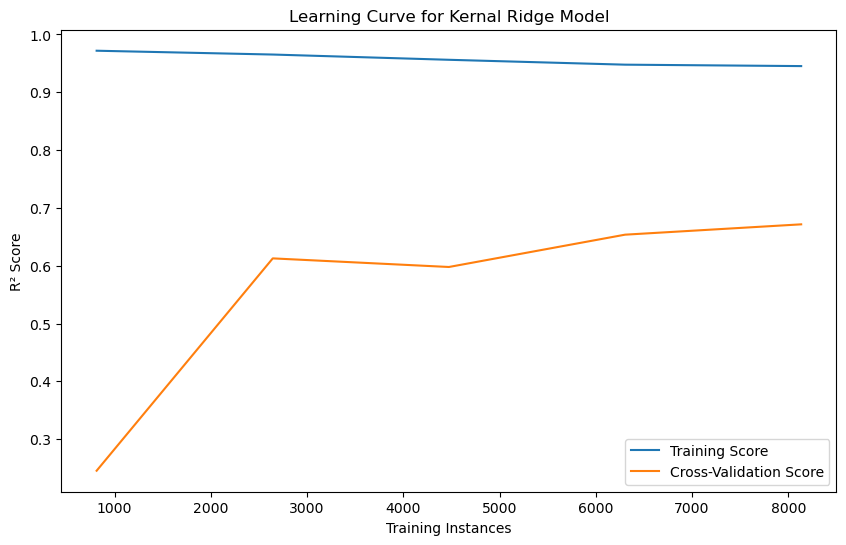

In [162]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(kr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R² Score')
plt.title('Learning Curve for Kernal Ridge Model')
plt.legend()
plt.show()

The learning curve above indicates that the model can improve further with more data.

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [163]:
y = df8_dummies_all_rb_scaled['market_value_in_eur']

In [164]:
y.shape

(10167,)

In [165]:
X = df8_dummies_all_rb_scaled.drop(['market_value_in_eur'], axis = 1)

In [166]:
X.shape

(10167, 370)

In [167]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05,  random_state = 42)

In [168]:
#Instantiate and fit model
kr = KernelRidge(alpha = 2.0, kernel = 'poly', degree = 3, gamma = 0.01, coef0 = 5).fit(X, y)

In [169]:
# Calculate the mean values and Standard deviation
get_cv_scores(kr)

CV Mean R²:  0.7021649768219284
CV STD:  0.06540746959652295
Mean Absolute Error (MAE):  0.5178535589946135
Mean Squared Error (MSE):  0.8810696074077469
Root Mean Squared Error (RMSE):  0.9386530814990951
R-squared (R²):  0.9408780755276881




In [170]:
# Comparing training to testing results
print(f'R² training set score: {kr.score(X_train, y_train)}')
print(f'R² testing set score: {kr.score(X_test, y_test)}')

R² training set score: 0.9408780755276881
R² testing set score: 0.9634918196102302


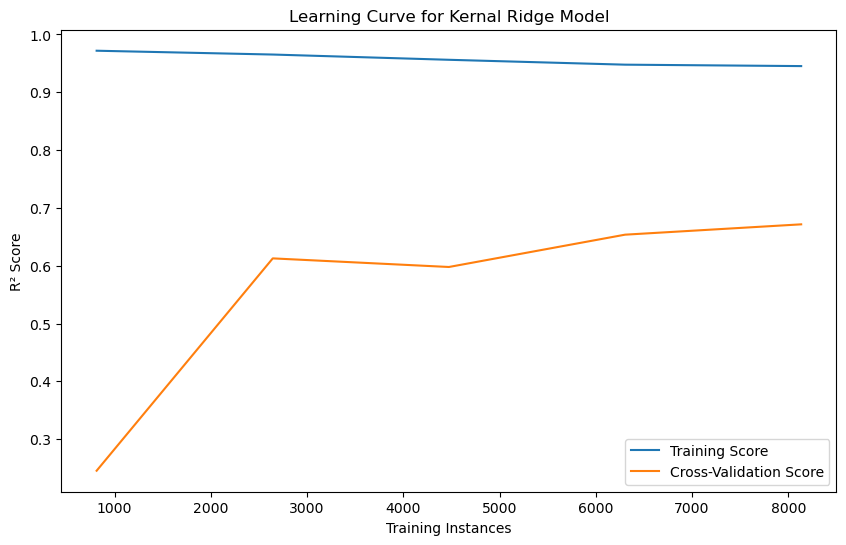

In [171]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(kr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R² Score')
plt.title('Learning Curve for Kernal Ridge Model')
plt.legend()
plt.show()

## Tenth Model: Random Forest Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [172]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [173]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [174]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7042408417755629
CV STD:  0.05700964344141807
Mean Absolute Error (MAE):  0.2867946991189204
Mean Squared Error (MSE):  0.5807043142533348
Root Mean Squared Error (RMSE):  0.762039575254025
R-squared (R²):  0.9610333209551482




The Random Forest Regeressor has produced the best CV Mean R² score so far at 0.71. MAE, MSE and RMSE are also promising.

In [175]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9610333209551482
R² testing set score: 0.7295183507394128


The training and test results above indicate and overfitting model.

## Eleventh Model: Random Forest Regressor on  Dummies Dataset with all features ( MinMax Scaled)

Applying Random Forest Regressor algorithm to MinMAx Scaled data as this produced a more generalised model when used on a Linear Regression model.

In [176]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [177]:
y.shape

(10167,)

In [178]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [179]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [180]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

In [181]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10167, 370), (10167,), (8133, 370), (2034, 370), (8133,), (2034,))

#### <span style="color:Teal">Modelling</span>

In [182]:
#Instantiating Random Forest Regressor algorithm and storing it to 'forest' object
forest = RandomForestRegressor()

In [183]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [184]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.6964552793839995
CV STD:  0.04486948809707107
Mean Absolute Error (MAE):  0.004123504603193011
Mean Squared Error (MSE):  0.0001267865060556106
Root Mean Squared Error (RMSE):  0.011259951423323752
R-squared (R²):  0.9568222702388928




In [185]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9568222702388928
R² testing set score: 0.7275477500580083


In [186]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [187]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.014745
6098,0.013834,0.020340
4338,0.011056,0.021368
2232,0.001611,0.002137
9798,0.066615,0.036256


The resulst are at least in the same ball park unlike previous models

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [188]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

In [189]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [190]:
# Calculate the mean values and Standard deviation
get_cv_scores(forest)

CV Mean R²:  0.7029260923858253
CV STD:  0.04734895599749583
Mean Absolute Error (MAE):  0.0039667187043943815
Mean Squared Error (MSE):  0.00011058492311991976
Root Mean Squared Error (RMSE):  0.010515936625898796
R-squared (R²):  0.9618067415426836




The 90:10 train:test split produces the best results. Although we see signs of overfitting below, the MAE, MSE and RMSE are quite low indicating the lowest difference so far between actual and prediccted values. 

In [191]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9618067415426836
R² testing set score: 0.7658678288549282


The model is still overfitting to the training dataset. Overfitting is not uncommon for Random Forest models. We may need to appy pruning or early stopping or some other hyperparameter tuning to counter this.

In [192]:
# Calculate the predicted values
y_pred = forest.predict(X_test)

In [193]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.015148
6098,0.013834,0.021440
4338,0.011056,0.019559
2232,0.001611,0.001699
9798,0.066615,0.034635


### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [194]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

In [195]:
#Fitting the model to nthe data
forest.fit(X_train, y_train)

RandomForestRegressor()

In [196]:
# Comparing training to testing results
print(f'R² training set score: {forest.score(X_train, y_train)}')
print(f'R² testing set score: {forest.score(X_test, y_test)}')

R² training set score: 0.9551942339181899
R² testing set score: 0.6845703382115603


### <span style="color:Teal">Hyperparameter Tuning</span>

## Twelfth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( MinMax Scaled)

In [197]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [198]:
y.shape

(10167,)

In [199]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [200]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 70% Training and 30% for Testing</span>

In [201]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [202]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor()

In [203]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [204]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8831103722950129
R² testing set score: 0.7154048766659411


In [205]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6918186881119407
CV STD:  0.05276432060638098
Mean Absolute Error (MAE):  0.009244656194786692
Mean Squared Error (MSE):  0.00033673956245177354
Root Mean Squared Error (RMSE):  0.018350464911052623
R-squared (R²):  0.8831103722950129




In [206]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [207]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.014712
6098,0.013834,0.019666
4338,0.011056,0.027511
2232,0.001611,0.007449
9798,0.066615,0.026880


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [208]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [209]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [210]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7157081489523366
CV STD:  0.04433891832554941
Mean Absolute Error (MAE):  0.009436465086022154
Mean Squared Error (MSE):  0.00034976960156725
Root Mean Squared Error (RMSE):  0.018702128263041348
R-squared (R²):  0.8808843479881306




In [211]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8808843479881306
R² testing set score: 0.7645702604293871


In [212]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [213]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.013946
6098,0.013834,0.015789
4338,0.011056,0.028685
2232,0.001611,0.008143
9798,0.066615,0.022893


### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [214]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [215]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [216]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7198969996577372
CV STD:  0.04203375264465396
Mean Absolute Error (MAE):  0.009480686845298566
Mean Squared Error (MSE):  0.0003596097118915298
Root Mean Squared Error (RMSE):  0.01896337817720065
R-squared (R²):  0.8757998262101226




In [217]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8757998262101226
R² testing set score: 0.801708648030947


In [218]:
# Calculate the predicted values
y_pred = gbr.predict(X_test)

In [219]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
8565,0.002722,0.013536
6098,0.013834,0.018290
4338,0.011056,0.028668
2232,0.001611,0.007151
9798,0.066615,0.023310


## Thirteenth Model: Gradient Boosting Regressor on  Dummies Dataset with all features ( Robust Scaled)

In [220]:
df8_dummies_all_rb_scaled.shape

(10167, 371)

In [221]:
y = df8_dummies_all_mm_scaled['market_value_in_eur']

In [222]:
y.shape

(10167,)

In [223]:
X = df8_dummies_all_mm_scaled.drop(['market_value_in_eur'], axis = 1)

In [224]:
X.shape

(10167, 370)

### <span style="color:Teal">Split: 90% Training and 10% for Testing</span>

In [225]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [226]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [227]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7190926509086222
CV STD:  0.041922757631657516
Mean Absolute Error (MAE):  0.009480686845298566
Mean Squared Error (MSE):  0.00035960971189152977
Root Mean Squared Error (RMSE):  0.01896337817720065
R-squared (R²):  0.8757998262101226




The results from GBR on the differently scaled dataset is almost identical, unlike the previous Linear Regression Model which showed better generalisation on the MinMax Scaled data. We will continue with the Robust Scaled dataset and try to optimise the model and reduce overfitting through hyperparameter tuning.

In [228]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8757998262101226
R² testing set score: 0.7999817772892439


### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [229]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [230]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

#### <span style="color:Teal">Evaluating the Model</span>

In [231]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.7155925135288482
CV STD:  0.04317961054718069
Mean Absolute Error (MAE):  0.009436465086022154
Mean Squared Error (MSE):  0.00034976960156725
Root Mean Squared Error (RMSE):  0.018702128263041348
R-squared (R²):  0.8808843479881306




CV Mean R² score is slightly lower on a 80:20 train:test split but the other metrics are slightly better.

In [232]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8808843479881306
R² testing set score: 0.7652246320937999


Although still overfitting, these are the best results so far.

### <span style="color:Teal">Hyperparameter Tuning</span>

In [233]:
# define the hyperparameter space
param_distributions = {
    'n_estimators': [20, 50, 70, 100, 200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'n_iter_no_change': [1, 2, 3, 4, 5, 6],
    'validation_fraction': [0.1, 0.2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

# define the number of iterations and cross-validation folds
n_iter = 50
cv = 5

# create the random search object
random_search = RandomizedSearchCV(
    gbr,  
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    random_state=42
)


# fit the random search on the data
random_search.fit(X, y)

# print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('\nBest score:', random_search.best_score_)

Best parameters: {'validation_fraction': 0.2, 'subsample': 1.0, 'n_iter_no_change': 6, 'n_estimators': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.2}

Best score: -0.013300983078035372


## Fourteenth Model: Gradient Boosting Regressor on Dummies Dataset with all features ( MinMax Scaled) and Hyperparamaters tuned

### <span style="color:Teal">Split: 80% Training and 20% for Testing</span>

In [234]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42) 

#### <span style="color:Teal">Modelling</span>

In [235]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
# Hyperparameters based on random search CV
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 20, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [236]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=20, n_iter_no_change=6, random_state=42,
                          validation_fraction=0.2)

#### <span style="color:Teal">Evaluating the Model</span>

In [237]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6301235991806478
CV STD:  0.039417115002086514
Mean Absolute Error (MAE):  0.01042980940192397
Mean Squared Error (MSE):  0.00045863119883789004
Root Mean Squared Error (RMSE):  0.02141567647397322
R-squared (R²):  0.8438110286377849




In [238]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8438110286377849
R² testing set score: 0.7151631365581638


The results are not as expected. Both training and testing scores are worse with the model still overfitting.

#### More Hyperparameter Tuning

In [239]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [240]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [241]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.630724085599678
CV STD:  0.04025050172102392
Mean Absolute Error (MAE):  0.01042980940192397
Mean Squared Error (MSE):  0.00045863119883789004
Root Mean Squared Error (RMSE):  0.02141567647397322
R-squared (R²):  0.8438110286377849




In [242]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8438110286377849
R² testing set score: 0.7151631365581638


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [243]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'log2', 
                                 max_depth = 6, 
                                 learning_rate = 0.2,
                                 random_state = 42)

In [244]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features='log2',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [245]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.5418967118758344
CV STD:  0.06294736327337509
Mean Absolute Error (MAE):  0.013927098205713471
Mean Squared Error (MSE):  0.0009034663058371948
Root Mean Squared Error (RMSE):  0.03005771624453852
R-squared (R²):  0.6923203800206148




In [246]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.6923203800206148
R² testing set score: 0.5536420352960105


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [247]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.2, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [248]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=6,
                          random_state=42, validation_fraction=0.2)

In [249]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.5964254420725992
CV STD:  0.053108686508661275
Mean Absolute Error (MAE):  0.010285588200730679
Mean Squared Error (MSE):  0.000435379755480581
Root Mean Squared Error (RMSE):  0.020865755569367265
R-squared (R²):  0.8517294149792876




In [250]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8517294149792876
R² testing set score: 0.6657394857752785


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [251]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1000, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [252]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=8,
                          n_estimators=1000, n_iter_no_change=8,
                          random_state=42, validation_fraction=0.3)

In [253]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6189006876622349
CV STD:  0.035432876494979525
Mean Absolute Error (MAE):  0.01051956350928204
Mean Squared Error (MSE):  0.0005253531005549051
Root Mean Squared Error (RMSE):  0.022920582465437152
R-squared (R²):  0.8210885770842984




In [254]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8210885770842984
R² testing set score: 0.6192296041339335


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [255]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 8, 
                                 n_estimators = 1500, 
                                 min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 6, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [256]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=6, min_samples_leaf=4,
                          min_samples_split=8, n_estimators=1500,
                          n_iter_no_change=8, random_state=42,
                          validation_fraction=0.3)

In [257]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.662672659948252
CV STD:  0.03950666912469039
Mean Absolute Error (MAE):  0.008073036006682643
Mean Squared Error (MSE):  0.0003721330767576178
Root Mean Squared Error (RMSE):  0.019290751067742744
R-squared (R²):  0.873268363303882




In [258]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.873268363303882
R² testing set score: 0.7340739246130852


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [259]:
#Instantiating Gradient Boosting Regressor algorithm and storing it to 'gbr' object
gbr = GradientBoostingRegressor( validation_fraction = 0.3, 
                                 #subsample = 1.0, 
                                 n_iter_no_change = 6, 
                                 n_estimators = 100, 
                                 #min_samples_split = 8, 
                                 min_samples_leaf = 4, 
                                 #max_features = 'sqrt', 
                                 max_depth = 5, 
                                 learning_rate = 0.4,
                                 random_state = 42)

In [260]:
#Fitting the model to nthe data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.4, max_depth=5, min_samples_leaf=4,
                          n_iter_no_change=6, random_state=42,
                          validation_fraction=0.3)

In [261]:
# Calculate the mean values and Standard deviation
get_cv_scores(gbr)

CV Mean R²:  0.6553945768691019
CV STD:  0.05844219190281339
Mean Absolute Error (MAE):  0.009237445218941147
Mean Squared Error (MSE):  0.0004510684099275587
Root Mean Squared Error (RMSE):  0.021238371169361333
R-squared (R²):  0.8463865713037162




In [262]:
# Comparing training to testing results
print(f'R² training set score: {gbr.score(X_train, y_train)}')
print(f'R² testing set score: {gbr.score(X_test, y_test)}')

R² training set score: 0.8463865713037162
R² testing set score: 0.7646591120812989


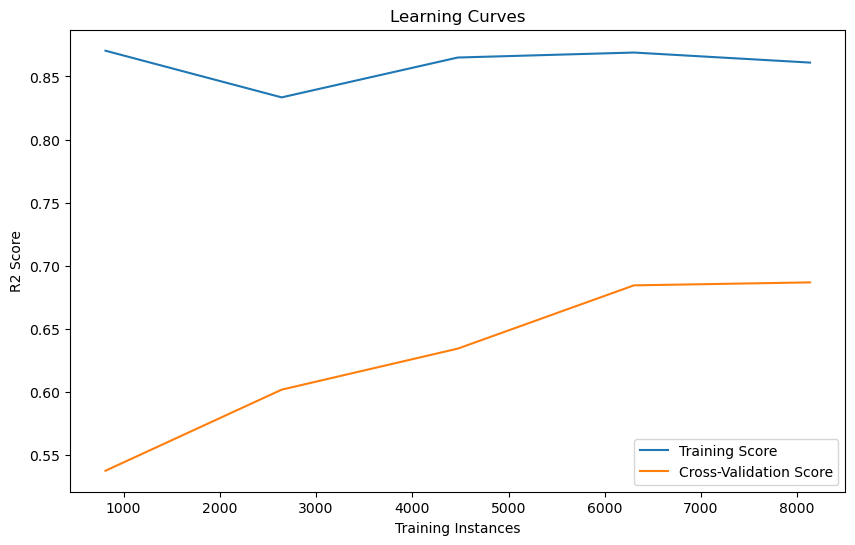

In [263]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Instances')
plt.ylabel('R2 Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

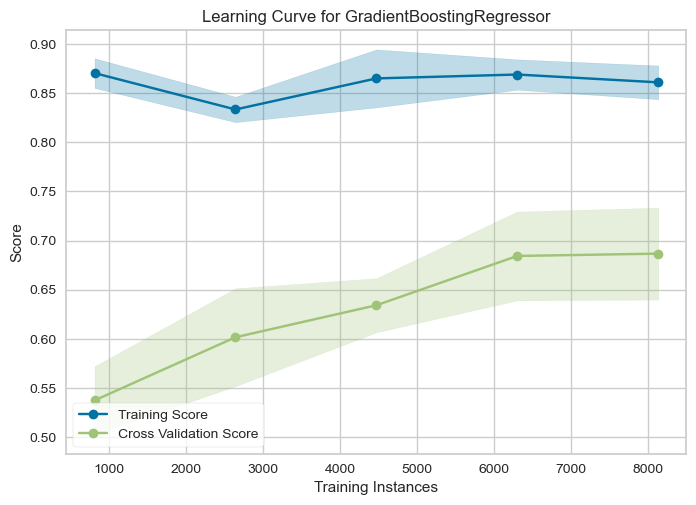

In [264]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(gbr, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show(); 

# <span style="color:Tomato"> Second Iteration</span>

#  <span style="color:SeaGreen"> Mean Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded</span>

#### <span style="color:Teal">Loading in Data</span>

In [4]:
dummies_mean_df_train = pd.read_csv('dummies_mean_df_train.csv')
dummies_mean_df_test = pd.read_csv('dummies_mean_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [23]:
print(dummies_mean_df_train.shape, dummies_mean_df_test.shape)

(8133, 371) (2034, 371)


In [7]:
y_train = dummies_mean_df_train['market_value_in_eur']

In [8]:
X_train = dummies_mean_df_train.drop(['market_value_in_eur'], axis = 1)

In [9]:
y_test = dummies_mean_df_test['market_value_in_eur']

In [10]:
X_test = dummies_mean_df_test.drop(['market_value_in_eur'], axis = 1)

In [11]:
# Show the rows and columns
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8133, 370), (2034, 370), (8133,), (2034,))

In [12]:
#pip install --user pycaret

In [17]:
# pip install --upgrade dask pandas lightgbm

### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [21]:
# Initiating pycaret model comparison setup
regression1 = setup(dummies_mean_df_train, target = 'market_value_in_eur', session_id = 1)

,Description,Value
0,Session id,1
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [22]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1939754.8315,28248435586192.2695,5232158.2777,0.7314,0.9261,1.3758,4.9780
gbr,Gradient Boosting Regressor,2187923.6019,28569724725207.2734,5292083.2006,0.7236,1.1462,2.1781,0.8760
rf,Random Forest Regressor,2084173.5548,31074572692853.1016,5516055.3376,0.6987,0.9649,1.5101,4.4000
lightgbm,Light Gradient Boosting Machine,2142740.2735,31969011414922.2266,5592479.2205,0.6906,1.0731,1.7760,0.1920
br,Bayesian Ridge,3556385.5739,41991066730875.9609,6434656.5922,0.5890,1.7285,6.6342,0.1860
ridge,Ridge Regression,3602210.4118,41874433163688.8359,6430653.6934,0.5883,1.7473,6.8759,0.0660
lasso,Lasso Regression,3619477.3392,42029532094238.4922,6444206.3591,0.5861,1.7572,6.9427,0.9090
lr,Linear Regression,3618929.3195,42031929030501.5469,6444384.3010,0.5860,1.7597,6.9409,0.6930
llar,Lasso Least Angle Regression,3574607.5897,42470168186817.5938,6473658.7582,0.5834,1.7299,6.5626,0.1090
omp,Orthogonal Matching Pursuit,3770294.0005,49224013517412.4844,6969379.6750,0.5180,1.7016,6.4780,0.0750


#  <span style="color:SeaGreen"> Mean Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and MinMax Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [25]:
minmax_dummies_mean_df_train = pd.read_csv('minmax_dummies_mean_df_train.csv')
minmax_dummies_mean_df_test = pd.read_csv('minmax_dummies_mean_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [26]:
print(minmax_dummies_mean_df_train.shape, minmax_dummies_mean_df_test.shape)

(8133, 371) (2034, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [30]:
regression2 = setup(minmax_dummies_mean_df_train, target = 'market_value_in_eur', session_id = 2)

,Description,Value
0,Session id,2
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0120,0.0009,0.0292,0.7142,0.0243,2.3329,0.7620
et,Extra Trees Regressor,0.0110,0.0009,0.0297,0.7110,0.0241,1.4974,4.2060
lightgbm,Light Gradient Boosting Machine,0.0117,0.0009,0.0299,0.6941,0.0247,1.9849,0.1570
rf,Random Forest Regressor,0.0119,0.0010,0.0314,0.6702,0.0258,1.6375,4.0210
knn,K Neighbors Regressor,0.0140,0.0014,0.0363,0.5581,0.0303,2.1998,0.0750
br,Bayesian Ridge,0.0197,0.0013,0.0362,0.5511,0.0299,7.2995,0.0690
ridge,Ridge Regression,0.0200,0.0013,0.0363,0.5452,0.0301,7.5726,0.0490
lr,Linear Regression,0.0211,0.0014,0.0368,0.5288,0.0307,8.3817,0.5970
omp,Orthogonal Matching Pursuit,0.0200,0.0015,0.0378,0.5106,0.0315,6.6989,0.0520
huber,Huber Regressor,0.0155,0.0018,0.0415,0.4465,0.0340,3.4102,1.0620


#  <span style="color:SeaGreen"> Mean Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and Robust Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [32]:
robust_dummies_mean_df_train = pd.read_csv('robust_dummies_mean_df_train.csv')
robust_dummies_mean_df_test = pd.read_csv('robust_dummies_mean_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [33]:
print(robust_dummies_mean_df_train.shape, robust_dummies_mean_df_test.shape)

(8133, 371) (2034, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [34]:
regression3 = setup(robust_dummies_mean_df_train, target = 'market_value_in_eur', session_id = 3)

,Description,Value
0,Session id,3
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [35]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.7936,4.7570,2.1546,0.7166,0.3283,1.4834,4.1490
gbr,Gradient Boosting Regressor,0.8776,4.8055,2.1848,0.7017,0.3630,2.0044,0.7520
rf,Random Forest Regressor,0.8445,5.1780,2.2565,0.6864,0.3496,1.6493,3.8220
lightgbm,Light Gradient Boosting Machine,0.8530,5.0570,2.2366,0.6827,0.3500,1.6460,0.1590
br,Bayesian Ridge,1.4433,6.9854,2.6269,0.5773,0.5856,5.7620,0.1630
ridge,Ridge Regression,1.4624,7.0096,2.6320,0.5750,0.5922,5.8521,0.0560
omp,Orthogonal Matching Pursuit,1.4940,8.0018,2.8074,0.5201,0.6011,5.9213,0.0570
huber,Huber Regressor,1.1284,10.0337,3.1147,0.4296,0.4227,2.7743,0.9910
lr,Linear Regression,1.8908,9.5995,3.0325,0.4268,0.7267,8.8100,0.0680
knn,K Neighbors Regressor,1.2572,10.6440,3.2379,0.3528,0.5306,2.9196,0.0640


#  <span style="color:SeaGreen"> Median Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded </span>

#### <span style="color:Teal">Loading in Data</span>

In [36]:
dummies_median_df_train = pd.read_csv('dummies_median_df_train.csv')
dummies_median_df_test = pd.read_csv('dummies_median_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [37]:
print(dummies_median_df_train.shape, dummies_median_df_test.shape)

(8133, 371) (2034, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [38]:
regression4 = setup(dummies_median_df_train, target = 'market_value_in_eur', session_id = 4)

,Description,Value
0,Session id,4
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [39]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1828057.8146,26582672728110.0703,5076258.9262,0.7402,0.7793,0.9594,4.0900
lightgbm,Light Gradient Boosting Machine,1989476.9527,28664450490479.3633,5299994.7288,0.7129,0.9769,1.2255,0.1760
gbr,Gradient Boosting Regressor,2131322.9408,28975973696938.4062,5326988.4449,0.7127,1.1917,1.8254,0.8120
rf,Random Forest Regressor,2003867.3364,29786393343646.6680,5402549.9007,0.7039,0.8210,1.0736,3.3640
br,Bayesian Ridge,3493336.9977,39902930632481.4844,6251453.9635,0.6044,1.7376,6.9485,0.1690
ridge,Ridge Regression,3537117.4262,40028781737226.8594,6265306.5579,0.6018,1.7535,7.2087,0.0670
lr,Linear Regression,3559275.6342,40220492072416.4141,6281903.9941,0.5993,1.7760,7.3002,0.0910
lasso,Lasso Regression,3556074.5359,40238508180155.7109,6283133.6699,0.5992,1.7750,7.2911,0.8340
llar,Lasso Least Angle Regression,3584408.6165,43172380089337.9375,6482652.7430,0.5753,1.7492,6.8289,0.0790
omp,Orthogonal Matching Pursuit,3662048.8699,45647226807361.2891,6689569.2554,0.5474,1.7254,6.9356,0.0660


#  <span style="color:SeaGreen"> Median Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and MinMax Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [40]:
minmax_dummies_median_df_train = pd.read_csv('minmax_dummies_median_df_train.csv')
minmax_dummies_median_df_test = pd.read_csv('minmax_dummies_median_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [41]:
print(minmax_dummies_median_df_train.shape, minmax_dummies_median_df_test.shape)

(8133, 371) (2034, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [42]:
regression5 = setup(minmax_dummies_median_df_train, target = 'market_value_in_eur', session_id = 5)

,Description,Value
0,Session id,5
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [43]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0104,0.0008,0.0285,0.7410,0.0233,1.0434,3.9510
gbr,Gradient Boosting Regressor,0.0116,0.0009,0.0290,0.7322,0.0241,1.9577,0.7890
lightgbm,Light Gradient Boosting Machine,0.0111,0.0009,0.0290,0.7311,0.0240,1.4130,0.1700
rf,Random Forest Regressor,0.0113,0.0010,0.0308,0.6986,0.0253,1.1704,3.4380
br,Bayesian Ridge,0.0197,0.0013,0.0356,0.5951,0.0296,8.2570,0.0790
ridge,Ridge Regression,0.0201,0.0013,0.0357,0.5903,0.0298,8.5562,0.0570
knn,K Neighbors Regressor,0.0136,0.0014,0.0369,0.5654,0.0306,1.8423,0.0750
omp,Orthogonal Matching Pursuit,0.0200,0.0014,0.0371,0.5584,0.0311,7.8874,0.0520
lr,Linear Regression,0.0218,0.0014,0.0371,0.5500,0.0311,9.8398,0.0550
huber,Huber Regressor,0.0155,0.0018,0.0416,0.4541,0.0342,3.7215,1.0700


#  <span style="color:SeaGreen"> Median Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and Robust Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [44]:
robust_dummies_median_df_train = pd.read_csv('robust_dummies_median_df_train.csv')
robust_dummies_median_df_test = pd.read_csv('robust_dummies_median_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [45]:
print(robust_dummies_median_df_train.shape, robust_dummies_median_df_test.shape)

(8133, 371) (2034, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [46]:
regression6 = setup(robust_dummies_median_df_train, target = 'market_value_in_eur', session_id = 6)

,Description,Value
0,Session id,6
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 371)"
4,Transformed data shape,"(8133, 371)"
5,Transformed train set shape,"(5693, 371)"
6,Transformed test set shape,"(2440, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [47]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8344,5.9418,2.3968,0.7327,0.3227,1.3328,4.3180
gbr,Gradient Boosting Regressor,0.9392,6.0190,2.4250,0.7240,0.3646,1.8699,0.7780
lightgbm,Light Gradient Boosting Machine,0.9046,6.1965,2.4590,0.7141,0.3492,1.5243,0.1870
rf,Random Forest Regressor,0.9110,6.6355,2.5476,0.6958,0.3482,1.5352,3.3970
br,Bayesian Ridge,1.5853,8.5512,2.9007,0.6042,0.6189,5.8043,0.1280
ridge,Ridge Regression,1.6135,8.6214,2.9138,0.6002,0.6287,5.9969,0.0560
lr,Linear Regression,1.6617,8.7984,2.9421,0.5927,0.6449,6.2842,0.0530
omp,Orthogonal Matching Pursuit,1.6728,9.6537,3.0813,0.5538,0.6415,6.0690,0.0490
huber,Huber Regressor,1.2500,11.8044,3.3882,0.4682,0.4479,2.8919,1.0680
knn,K Neighbors Regressor,1.3552,12.5966,3.5155,0.4095,0.5428,2.7252,0.0690


#  <span style="color:SeaGreen"> Median Imputed Dataset:</span><span style="color:YellowGreen"> Categoricals :</span><span style="color:DarkSlateBlue"> No Label Encoding or Scaling </span>

#### <span style="color:Teal">Loading in Data</span>

In [48]:
LightGBM_median_df = pd.read_csv('LightGBM_median_df.csv')

#### <span style="color:Teal">Train : Test Split</span>

In [49]:
LightGBM_median_df_train, LightGBM_median_df_test = train_test_split(LightGBM_median_df, test_size=0.2, random_state=100)

#### <span style="color:Teal">Confirming Load</span>

In [50]:
print(LightGBM_median_df_train.shape, LightGBM_median_df_test.shape)

(8133, 64) (2034, 64)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [51]:
regression7 = setup(LightGBM_median_df_train, target = 'market_value_in_eur', session_id = 7)

,Description,Value
0,Session id,7
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8133, 64)"
4,Transformed data shape,"(8133, 98)"
5,Transformed train set shape,"(5693, 98)"
6,Transformed test set shape,"(2440, 98)"
7,Numeric features,57
8,Categorical features,6
9,Preprocess,True


#### <span style="color:Teal">Comparing Baseline Models</span>

In [52]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4948029.5000,103005373123788.7969,10042817.4000,-0.0024,2.2266,11.9565,0.0550
br,Bayesian Ridge,5090767.3910,108311846107445.5625,10305667.5185,-0.0575,2.2149,12.0407,0.0740
omp,Orthogonal Matching Pursuit,5103844.1424,108482834293041.5625,10313353.3588,-0.0589,2.2127,12.0869,0.0570
en,Elastic Net,5132778.5272,108909319454822.3906,10334640.9855,-0.0636,2.2252,12.1078,0.2500
llar,Lasso Least Angle Regression,5166473.1754,109467426254564.2031,10362568.6054,-0.0698,2.2381,12.1378,0.0600
lr,Linear Regression,5178217.1334,109664223759800.5938,10371912.1814,-0.0717,2.2422,12.1627,0.1190
ridge,Ridge Regression,5178211.1194,109663361335712.5469,10371830.1570,-0.0717,2.2431,12.1617,0.0670
lasso,Lasso Regression,5178650.3423,109673940404178.9688,10372337.1903,-0.0718,2.2436,12.1630,0.2540
huber,Huber Regressor,3630976.3017,113338728896918.8438,10538011.8297,-0.1047,1.7008,1.9488,0.0860
gbr,Gradient Boosting Regressor,5191139.1126,114164166205723.8281,10585723.0026,-0.1186,2.2060,12.2568,0.6060


#  <span style="color:SeaGreen"> KNN Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded </span>

#### <span style="color:Teal">Loading in Data</span>

In [53]:
dummies_knn_df_train = pd.read_csv('dummies_knn_df_train.csv')
dummies_knn_df_test = pd.read_csv('dummies_knn_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [54]:
print(dummies_knn_df_train.shape, dummies_knn_df_test.shape)

(8147, 371) (2037, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [55]:
regression8 = setup(dummies_knn_df_train, target = 'market_value_in_eur', session_id = 8)

,Description,Value
0,Session id,8
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8147, 371)"
4,Transformed data shape,"(8147, 371)"
5,Transformed train set shape,"(5702, 371)"
6,Transformed test set shape,"(2445, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [56]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1833414.4136,22780099936902.7031,4738330.0330,0.7207,0.8908,1.2326,4.5010
gbr,Gradient Boosting Regressor,2019896.3317,22575038301470.6875,4734585.8179,0.7168,1.1130,1.9722,0.8000
lightgbm,Light Gradient Boosting Machine,1939611.0766,23487988540748.3750,4829315.9686,0.7058,1.0138,1.4854,0.2030
rf,Random Forest Regressor,1953027.6676,24505220235657.2422,4922487.2286,0.6985,0.9248,1.3498,3.9740
br,Bayesian Ridge,3303265.6934,33499688080554.8047,5750722.2271,0.5886,1.6988,6.5952,0.1800
ridge,Ridge Regression,3343583.6055,33485068492326.3945,5754418.9653,0.5862,1.7194,6.9040,0.0620
lasso,Lasso Regression,3360593.4984,33635265418750.1641,5768579.6903,0.5836,1.7189,6.9940,0.7670
lr,Linear Regression,3361959.9184,33640494707318.6562,5769099.1269,0.5835,1.7235,6.9969,0.1070
llar,Lasso Least Angle Regression,3343459.3806,36082106037000.2812,5964060.3535,0.5584,1.6770,6.2374,0.0760
omp,Orthogonal Matching Pursuit,3495052.3903,38729840825790.6406,6177499.7514,0.5278,1.7086,6.5147,0.0650


#  <span style="color:SeaGreen"> KNN Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and MinMax Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [57]:
minmax_dummies_knn_df_train = pd.read_csv('minmax_dummies_knn_df_train.csv')
minmax_dummies_knn_df_test = pd.read_csv('minmax_dummies_knn_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [58]:
print(minmax_dummies_knn_df_train.shape, minmax_dummies_knn_df_test.shape)

(8147, 371) (2037, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [59]:
regression9 = setup(minmax_dummies_knn_df_train, target = 'market_value_in_eur', session_id = 9)

,Description,Value
0,Session id,9
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8147, 371)"
4,Transformed data shape,"(8147, 371)"
5,Transformed train set shape,"(5702, 371)"
6,Transformed test set shape,"(2445, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [60]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0102,0.0007,0.0268,0.7245,0.0225,1.3599,4.5230
gbr,Gradient Boosting Regressor,0.0114,0.0008,0.0275,0.7100,0.0233,2.2642,0.8220
lightgbm,Light Gradient Boosting Machine,0.0110,0.0008,0.0284,0.6897,0.0238,1.7926,0.1980
rf,Random Forest Regressor,0.0111,0.0008,0.0287,0.6840,0.0241,1.4636,3.9390
br,Bayesian Ridge,0.0184,0.0011,0.0333,0.5775,0.0281,7.5536,0.0800
ridge,Ridge Regression,0.0188,0.0011,0.0335,0.5719,0.0283,7.8665,0.0520
knn,K Neighbors Regressor,0.0132,0.0012,0.0344,0.5463,0.0293,2.1945,0.0740
lr,Linear Regression,0.0201,0.0012,0.0349,0.5298,0.0297,8.6529,0.0740
omp,Orthogonal Matching Pursuit,0.0190,0.0012,0.0352,0.5265,0.0298,7.2836,0.0630
huber,Huber Regressor,0.0145,0.0015,0.0387,0.4289,0.0325,3.4166,1.0800


#  <span style="color:SeaGreen"> KNN Imputed Dataset:</span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and Robust Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

In [61]:
robust_dummies_knn_df_train = pd.read_csv('robust_dummies_knn_df_train.csv')
robust_dummies_knn_df_test = pd.read_csv('robust_dummies_knn_df_test.csv')

#### <span style="color:Teal">Confirming Load</span>

In [62]:
print(robust_dummies_knn_df_train.shape, robust_dummies_knn_df_test.shape)

(8147, 371) (2037, 371)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [63]:
regression10 = setup(robust_dummies_knn_df_train, target = 'market_value_in_eur', session_id = 10)

,Description,Value
0,Session id,10
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8147, 371)"
4,Transformed data shape,"(8147, 371)"
5,Transformed train set shape,"(5702, 371)"
6,Transformed test set shape,"(2445, 371)"
7,Numeric features,370
8,Preprocess,True
9,Imputation type,simple


#### <span style="color:Teal">Comparing Baseline Models</span>

In [64]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6896,3.5700,1.8715,0.7221,0.3101,1.8278,4.4710
gbr,Gradient Boosting Regressor,0.7690,3.8151,1.9441,0.6983,0.3466,2.4774,0.7540
lightgbm,Light Gradient Boosting Machine,0.7399,3.9457,1.9734,0.6893,0.3319,1.9626,0.1500
rf,Random Forest Regressor,0.7328,4.0103,1.9875,0.6873,0.3294,2.0249,4.0000
br,Bayesian Ridge,1.2684,5.4536,2.3250,0.5690,0.5532,6.8679,0.1280
ridge,Ridge Regression,1.2901,5.4699,2.3296,0.5666,0.5625,7.0975,0.0510
lr,Linear Regression,1.2994,5.5117,2.3387,0.5632,0.5659,7.1791,0.0700
omp,Orthogonal Matching Pursuit,1.3409,6.3563,2.5092,0.4991,0.5757,7.1490,0.0610
huber,Huber Regressor,0.9841,7.5922,2.7314,0.4114,0.4050,3.2219,1.0230
knn,K Neighbors Regressor,1.1016,8.3060,2.8697,0.3440,0.5069,3.4771,0.0720


#  <span style="color:SeaGreen"> KNN Imputed Dataset:</span><span style="color:YellowGreen"> Categoricals :</span><span style="color:DarkSlateBlue"> No Label Encoding or Scaling </span>

#### <span style="color:Teal">Loading in Data</span>

In [65]:
LightGBM_knn_df = pd.read_csv('LightGBM_knn_df.csv')

#### <span style="color:Teal">Train : Test Split</span>

In [66]:
LightGBM_knn_df_train, LightGBM_knn_df_test = train_test_split(LightGBM_knn_df, test_size=0.2, random_state=100)

#### <span style="color:Teal">Confirming Load</span>

In [67]:
print(LightGBM_knn_df_train.shape, LightGBM_knn_df_test.shape)

(8147, 64) (2037, 64)


### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [68]:
regression11 = setup(LightGBM_knn_df_train, target = 'market_value_in_eur', session_id = 11)

,Description,Value
0,Session id,11
1,Target,market_value_in_eur
2,Target type,Regression
3,Original data shape,"(8147, 64)"
4,Transformed data shape,"(8147, 98)"
5,Transformed train set shape,"(5702, 98)"
6,Transformed test set shape,"(2445, 98)"
7,Numeric features,57
8,Categorical features,6
9,Preprocess,True


#### <span style="color:Teal">Comparing Baseline Models</span>

In [69]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4708384.5500,91781080075468.7969,9489741.5500,-0.0026,2.1962,11.8951,0.0630
br,Bayesian Ridge,4843588.9812,96460989032927.5312,9733915.6433,-0.0561,2.1701,11.7526,0.0730
omp,Orthogonal Matching Pursuit,4857271.2485,96802325846229.8594,9752081.9252,-0.0603,2.1780,11.7994,0.0550
en,Elastic Net,4886099.8885,97280967069948.8750,9778031.2891,-0.0664,2.1898,11.8493,0.2240
llar,Lasso Least Angle Regression,4930914.4805,97955915202832.4688,9812232.8279,-0.0740,2.1987,11.9720,0.0570
ridge,Ridge Regression,4938515.5973,98008464173102.4844,9814780.6567,-0.0746,2.2032,12.0327,0.0620
lasso,Lasso Regression,4939234.0060,98018637943947.3438,9815276.6219,-0.0747,2.2026,12.0369,0.1950
huber,Huber Regressor,3495460.4188,100968590815980.3750,9955907.3351,-0.1039,1.6855,2.1863,0.0790
gbr,Gradient Boosting Regressor,4936603.5010,102130234628195.4062,10029413.6195,-0.1252,2.1684,12.0896,0.5920
lightgbm,Light Gradient Boosting Machine,5064987.6817,104444509143404.5781,10140216.8228,-0.1492,2.1878,11.9707,0.1830


#  <span style="color:SeaGreen"> Mean Imputed Datasets:</span><span style="color:YellowGreen"> Filtered for only Premier League Dataset </span><span style="color:DarkSlateBlue"> One-Hot Label Encoded and MinMax Scaled</span>

#### <span style="color:Teal">Loading in Data</span>

#### <span style="color:Teal">Confirming Load</span>

In [ ]:
print(dummies_mean_df_train.shape, dummies_mean_df_test.shape)

### <span style="color:YellowGreen">Selecting the Best Base Model for Optimising</span>

#### <span style="color:Teal">Model Comparison Setup</span>

In [ ]:
regression12 = setup(dummies_mean_df_train, target = 'market_value_in_eur', session_id = 12)

#### <span style="color:Teal">Comparing Baseline Models</span>

In [ ]:
best = compare_models()

# Comparing Results

In [265]:
linear_regression_results = {
    'Model': 'Linear Regression',
    'CV Mean R²': 0.47073213209280906,
    'CV STD': 0.053393224849868914,
    'MAE': 3809591.7146170284,
    'MSE': 50217410489758.555,
    'RMSE': 7086424.379738949,
    'R²': 0.49677885162408064,
    'R² training set score': 0.49677885162408064,
    'R² testing set score': 0.37396667115895665
}


kernal_ridge_results = {
    'Model': 'Kernal Ridge',
    'CV Mean R²': 0.7040907820064072,
    'CV STD': 0.06786813709465349,
    'MAE': 0.5106171090924516,
    'MSE': 0.8730080893241261,
    'RMSE': 0.9343490190095595,
    'R²': 0.9440620144472016,
    'R² training set score': 0.9440620144472016,
    'R² testing set score': 0.9437709829637032
}

# Results for Random Forest Regressor
random_forest_results = {
    'Model': 'Random Forest Regressor',
    'CV Mean R²': 0.7156304018368109,
    'CV STD': 0.03605767081595555,
    'MAE': 0.004029437935089631,
    'MSE': 0.00011964819963889735,
    'RMSE': 0.010938381947934409,
    'R²': 0.9611574715601694,
    'R² training set score': 0.9611574715601694,
    'R² testing set score': 0.7356555852201675
}

# Results for Gradient Boosting Regressor
gradient_boosting_results = {
    'Model': 'Gradient Boosting Regressor',
    'CV Mean R²': 0.7239960005570505,
    'CV STD': 0.02787806454942855,
    'MAE': 0.009255820106858772,
    'MSE': 0.00034369507056230923,
    'RMSE': 0.018539014821783526,
    'R²': 0.8865448920312892,
    'R² training set score': 0.8865448920312892,
    'R² testing set score': 0.7552373753014826
}

# Create a DataFrame to display and compare the results
results_df = pd.DataFrame([linear_regression_results, kernal_ridge_results, random_forest_results, gradient_boosting_results])

# Display the results DataFrame
print(results_df)

                         Model  CV Mean R²    CV STD           MAE  \
0            Linear Regression    0.470732  0.053393  3.809592e+06   
1                 Kernal Ridge    0.704091  0.067868  5.106171e-01   
2      Random Forest Regressor    0.715630  0.036058  4.029438e-03   
3  Gradient Boosting Regressor    0.723996  0.027878  9.255820e-03   

            MSE          RMSE        R²  R² training set score  \
0  5.021741e+13  7.086424e+06  0.496779               0.496779   
1  8.730081e-01  9.343490e-01  0.944062               0.944062   
2  1.196482e-04  1.093838e-02  0.961157               0.961157   
3  3.436951e-04  1.853901e-02  0.886545               0.886545   

   R² testing set score  
0              0.373967  
1              0.943771  
2              0.735656  
3              0.755237  


In [266]:
results_df.head()

,Model,CV Mean R²,CV STD,MAE,MSE,RMSE,R²,R² training set score,R² testing set score
0,Linear Regression,0.470732,0.053393,3.809592e+06,5.021741e+13,7.086424e+06,0.496779,0.496779,0.373967
1,Kernal Ridge,0.704091,0.067868,5.106171e-01,8.730081e-01,9.343490e-01,0.944062,0.944062,0.943771
2,Random Forest Regressor,0.715630,0.036058,4.029438e-03,1.196482e-04,1.093838e-02,0.961157,0.961157,0.735656
3,Gradient Boosting Regressor,0.723996,0.027878,9.255820e-03,3.436951e-04,1.853901e-02,0.886545,0.886545,0.755237


CV Mean R²:  0.7239960005570505
CV STD:  0.02787806454942855
Mean Absolute Error (MAE):  0.009255820106858772
Mean Squared Error (MSE):  0.00034369507056230923
Root Mean Squared Error (RMSE):  0.018539014821783526
R-squared (R²):  0.8865448920312892